> 패스트캠퍼스 바이트디그리 데이터사이언스 과정 실전 데이터 분석 및 데이터 시각화 수업 내용을 정리한 자료입니다.
> sample 데이터의 경우 패캠 저작권 문제로 실습 진행 후 jupyter notebook에서 출력된 결과는 제거한 뒤 Repository에 push하였습니다.

### 그룹화(groupby)를 활용한 데이터 분석 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# matplotlib에서 한글깨짐 현상 해결
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

# [출처] 파이썬 그래프 한글이 깨질때&마이너스 부호 사용 | 작성자 데이터공방(https://blog.naver.com/kiddwannabe/221202864701)

In [4]:
df = pd.read_excel('d:/sample_data.xls', skiprows=[0])

#### groupby 함수
  - 전달된 Column을 기준으로 전체 데이터 분류

In [6]:
grouped = df.groupby('광고그룹')

In [7]:
grouped

In [79]:
# 집계함수를 활용하여 다양한 통계치 확인 가능
# 카운트
# grouped.count()

In [80]:
# 각 컬럼별 평균값
# grouped.mean()

In [81]:
# median - 중앙값
# grouped.median()

In [82]:
# 표준편차
# grouped.std()

In [83]:
# 분산
# grouped.var()

---

### 특정 열을 기준으로 그룹화 후, 데이터 전처리 하기

In [84]:
# 그룹 합계(sum) - 노출수, 클릭수, 총비용 컬럼에 대한 합계 구하기
# grouped.sum()

In [21]:
# 그룹화 이후의 각 컬럼별 집계 결과는 기준이 달라지기 때문에 데이터 전처리 과정이 필요하다.
# 본 예제의 경우 '광고그룹'이라는 컬럼으로 그룹화를 하였기 때문에 클릭률과 평균클릭비용을 그룹화 기준에 맞게 다시 계산해야 한다.
df_group = grouped.sum()

In [28]:
# 클릭율 CTR = 클릭수 / 노출수
# DataFrame은 열단위 연산이 가능
df_group['클릭률(%)'] = df_group['클릭수'] / df_group['노출수']

In [29]:
# 평균클릭비용 CPC = 총비용 / 클릭수
df_group['평균클릭비용(VAT포함,원)'] = df_group['총비용(VAT포함,원)'] / df_group['클릭수']

In [85]:
# 클릭수 컬럼 중 0인 데이터 존재 -> 평균클릭비용 컬럼 중 결측값 존재
# df_group[df_group['클릭수'] == 0]

#### `fillna` 함수를 이용하여 결측값을 대체

In [32]:
df_group['평균클릭비용(VAT포함,원)'] = df_group['평균클릭비용(VAT포함,원)'].fillna(0)

In [86]:
# df_group[df_group['클릭수'] == 0]

In [35]:
# 평균클릭비용 컬럼 -> 반올림(round) 처리하기
df_group['평균클릭비용(VAT포함,원)' ] = round(df_group['평균클릭비용(VAT포함,원)'], 0)

In [36]:
df_group['평균클릭비용(VAT포함,원)' ] = df_group['평균클릭비용(VAT포함,원)'].astype(int)

In [75]:
# df_group

---

### 데이터 시각화

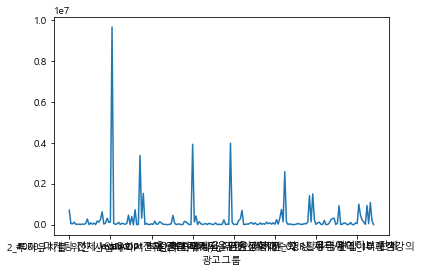

In [39]:
df_group['노출수'].plot()
plt.show()

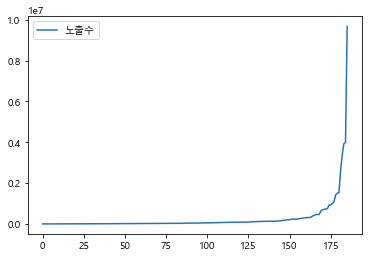

In [54]:
# 노출수 컬럼을 기준으로 선 그래프 생성
((df_group['노출수'].sort_values()).reset_index()).drop('광고그룹', axis=1).plot()
plt.show()

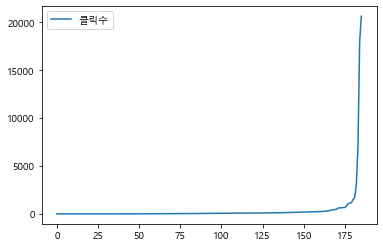

In [55]:
((df_group['클릭수'].sort_values()).reset_index()).drop('광고그룹', axis=1).plot()
plt.show()

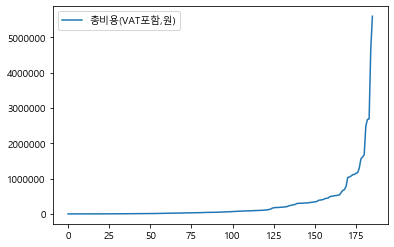

In [56]:
((df_group['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('광고그룹', axis=1).plot()
plt.show()

---

#### 중점관리 광고그룹 및 저효율 광고그룹 데이터 분석하기(사분위 구하기)
  - 상위 20%(노출수 80백분위수 이상)
  - 상위 10%(클릭수 90백분위수 이상)

In [57]:
imp = df_group['노출수']
clk = df_group['클릭수']

In [74]:
# 중점관리 광고그룹 데이터 분석
# 조건이 여러개인경우, DataFrame[(condition) & (condtion)]
result = df_group[(imp >= imp.quantile(0.8)) & (clk >= clk.quantile(0.9))]

# 중점관리 그룹의 index 추출
# result.index

---

#### 저효율 광고그룹 데이터 분석
  1. 노출수 80백분위수 미만
  2. 클릭수 90백분위수 미만
  3. 총비용 60백분위수 이상
  4. 총비용 90백분위수 미만

In [71]:
# 저효율 광고그룹 데이터 분석
cost = df_group['총비용(VAT포함,원)']

In [73]:
result = df_group[(imp < imp.quantile(0.8)) & (clk < clk.quantile(0.9)) & (cost >= cost.quantile(0.6)) & (cost < cost.quantile(0.9))]
# result.index